## Python statistics essential training - 04_04_testing

Standard imports

In [4]:
import math
import io

In [5]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [6]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [12]:
#position of pumps given in lat and longitude 
data = 'data/pumps.csv'
pumps = pd.read_csv(data)

In [13]:
pumps

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611
5,51.511542,-0.135919,0.051813,-0.199972
6,51.510019,-0.133962,0.187193,-0.369265
7,51.511295,-0.138199,-0.105910,-0.227428


In [14]:
cholera = pd.read_csv('data/cholera.csv')

In [15]:
cholera.loc[0::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


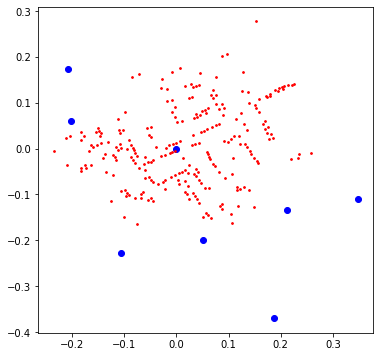

In [16]:
pp.figure(figsize=(6,6))
pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x, cholera.y, color='r', s=3)

In [17]:
img = matplotlib.image.imread('data/london.png')

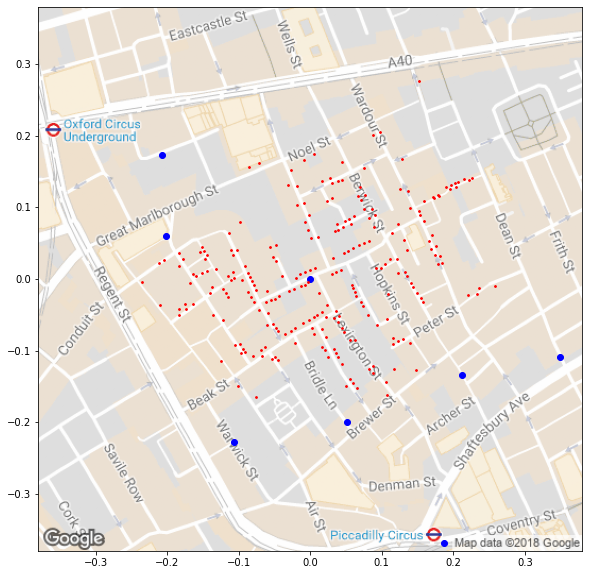

In [18]:
pp.figure(figsize=(10,10))

pp.imshow(img,extent=[-0.38,0.38,-0.38,0.38])

pp.scatter(pumps.x,pumps.y,color='b')
pp.scatter(cholera.x,cholera.y,color='r',s=3)

In [20]:
cholera.closest.value_counts()

0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [22]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

In [23]:
def simulate(n):
    return pd.DataFrame({'closest': np.random.choice([0,1,4,5], size=n, p=[0.65,0.15,0.10,0.10])})

In [24]:
simulate(489).closest.value_counts()

0    314
5     68
1     61
4     46
Name: closest, dtype: int64

In [27]:
sampling = pd.DataFrame({'counts': [simulate(489).closest.value_counts()[0] for i in range(10000)]})

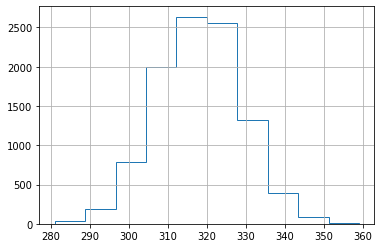

In [28]:
sampling.counts.hist(histtype='step')

In [29]:
scipy.stats.percentileofscore(sampling.counts,340)

98.16

In [30]:
100 - 98.14

1.8599999999999994

We have generated this distribution under the null hypothesis that the pumps have nothing to do with color, and the deaths occur simply proportionally to population. We can now compare this distribution with the observed number of 340 deaths in area zero. More precisely, we evaluate at what quantile we find 340 in this null hypothesis sampling distribution. Remember, I used scipy.stats.percentileofscore. So 340 is a very extreme value, which we would not expect from the null scenario. In fact, we'd expect it only 1.86 percent of the time. This is known as the P value, the smaller the P value, the more strongly we can reject the null hypothesis.

I've just presented a very simple example of hypothesis testing. We have made an observation, many deaths in area zero. We have made a hypothesis it's the pump. And we have estimated the distribution of expected deaths under a null hypothesis. Last, we have verified how extreme our observed finding was with respect to the null distribution. Note that the only two permissible conclusions from a formal hypothesis test such as this is I reject the null hypothesis, or I failed to reject the null hypothesis. This is a very formal way of reasoning, but it's the only one we can support firmly with statistics. The scientific community has recently witnessed a harsh debate about the value of hypothesis testing, and especially about what P value should be required to make a conclusion. The problem is that if you select, say P of 0.05, five percent, but you make many tests, eventually you are going to find many where the null hypothesis is wrongly rejected, just by chance. The lesson is that one must be careful about making conclusions, for instance, by requiring a lower P value or an established causal link, and not just apply a formula blindly.